## Importing the Halo Pipeline
In this section, we'll show the import statement and the initialization of the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

We first create an instance of the `HalosSkyPyPipeline` class, which is imported from the `sim_pipeline.Pipelines.halos_pipeline` module. This pipeline will be used to process data from the YAML file, `halo.yml`. The default settings for various parameters, such as `m_max`, `m_min`, etc., have been carefully chosen to ensure optimal performance and accurate results. We'll delve into the specifics of these parameter choices and their importance in the subsequent sections. Additionally, you can refer to the `readme.md` file in the `data/Skypy` folder for more information on the default settings.

In [1]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline(sky_area=0.0001,m_max='1.0E+16',m_min='1.0E+12',z_max=5.00)

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

        z                 mass       
------------------ ------------------
 1.732208159048093  3263955749523.328
0.6359914778008556 4393725802986.2886
0.4675923542024496  4569697819133.436
 1.418701485025681 1207669088713.1301
1.3406805613068513 1053741300235.3721
2.4766470803885774 1124384026492.6672
 1.012884671091733  7336502174490.834
 0.413391645427414 1212772270024.2112
  1.21307496211738 2447795362184.3003
3.8208824924274616 1248170598006.1948
               ...                ...
0.9720842697022529 1069586048509.2435
1.2943171463185237 2307303247759.4766
  2.70049916352253  6091951444401.447
 2.168345076634787 1413616979607.4866
1.6369887797638711 39205279520736.195
0.9260153138472471  5327944931656.625
1.5586930308530196  5673280153659.131
0.5790436380952729 1181531691919.0598
2.2381820974493825 4334884227925.1797
2.3408283846401017 11580504857644.938
1.0933691848225429 1455749896984.3047
Length = 61 rows


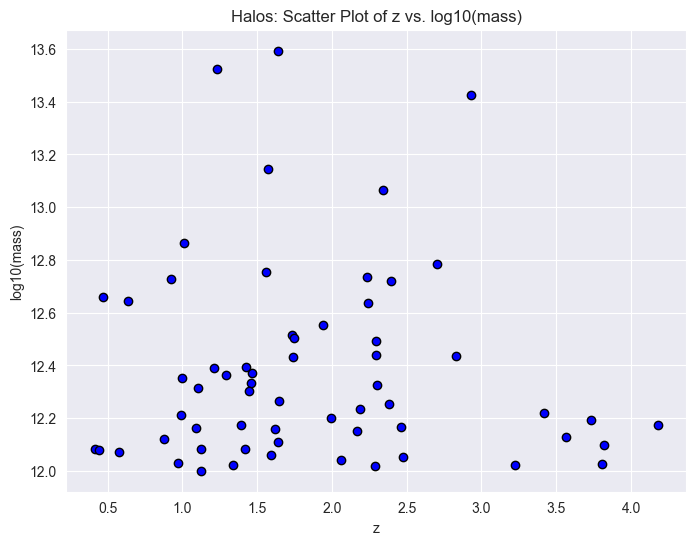

        z                kappa_ext       
------------------ ----------------------
0.4314261998776349   -0.02897773970031462
0.5636267496263654  -0.023479379127382485
0.6625812877903995  -0.020755978685799474
0.7456742991713243  -0.019002570703904917
0.8195770216306435  -0.017724676577931458
0.8870565147358739    -0.0167314984417836
0.9502214520333114  -0.015919626474050017
1.0100076614342062  -0.015236256829796666
 1.066905496865727  -0.014650430703558712
1.1217926617148708   -0.01413513503965348
               ...                    ...
3.3023001119355304 -0.0061550583791532935
3.3998295653264323   -0.00598724175628166
3.5044972613898047 -0.0058136882901783935
3.6176547539383814   -0.00563311786524735
 3.741041912418383  -0.005443939823595965
 3.877663210618965  -0.005243080669317083
  4.03081437322893  -0.005027712096153772
4.2062404057573595   -0.00479278063202446
 4.412810389471088  -0.004530128289796717
 4.666457553735017  -0.004226265779850525
               5.0  -0.00385334737

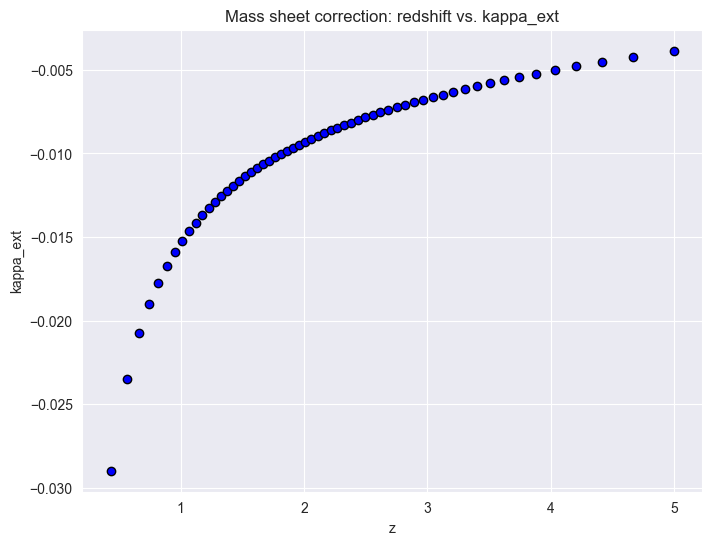

In [2]:
import matplotlib.pyplot as plt
import numpy as np

halos= pipeline.halos
mass_sheet_correction = pipeline.mass_sheet_correction
print(halos)
z_halos = halos['z']
mass_halos = halos['mass']

log_mass = np.log10(mass_halos)
plt.figure(figsize=(8, 6))
plt.scatter(z_halos, log_mass, c='blue', marker='o', edgecolors='black')
plt.title('Halos: Scatter Plot of z vs. log10(mass)')
plt.xlabel('z')
plt.ylabel('log10(mass)')
plt.grid(True)

# Show the plot
plt.show()
print(mass_sheet_correction)
redshifts_mass_correction = mass_sheet_correction['z']
kappa_ext = mass_sheet_correction['kappa_ext']
plt.figure(figsize=(8, 6))
plt.scatter(redshifts_mass_correction, kappa_ext, c='blue', marker='o', edgecolors='black')
plt.title('Mass sheet correction: redshift vs. kappa_ext')
plt.xlabel('z')
plt.ylabel('kappa_ext')
plt.grid(True)

## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence $ \kappa $ and shear $ \gamma_1$, $\gamma_2 $ (or shear $\gamma_{tot}$) at the origin due to all the halos.

In [3]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.Halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos,mass_correction_list= mass_sheet_correction,sky_area=0.0001,cosmo=cosmo, samples_number= 10000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,gamma1,gamma2 = halos_lens.get_convergence_shear(gamma12=True) #when gamma12=False,return kappa,gamma_tot
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)

kappa at center is:  0.47523168108246217
gamma1 at center is:  -0.0167967175982755
gamma2 at center is:  0.07754282600835882


C:\Users\TXZ27\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [4]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True, diff=None)
print(kappa_gamma_distribution)

For this Halos list, elapsed time for computing weak-lensing maps: 54.89119029045105 seconds
[[0.61694719 0.10591008]
 [0.66088296 0.06634179]
 [0.60011229 0.17278701]
 ...
 [0.42095107 0.06338713]
 [0.47292119 0.12416294]
 [0.73762327 0.06301509]]


### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

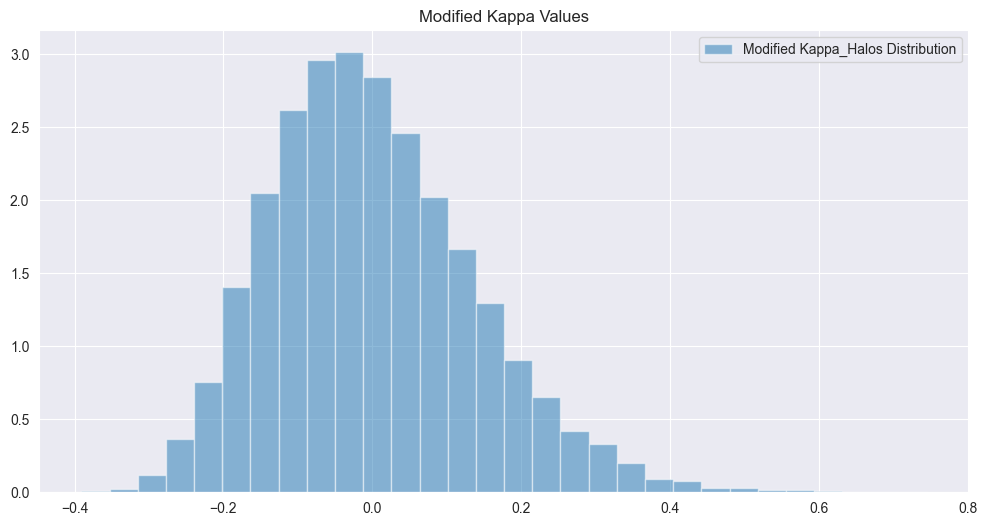

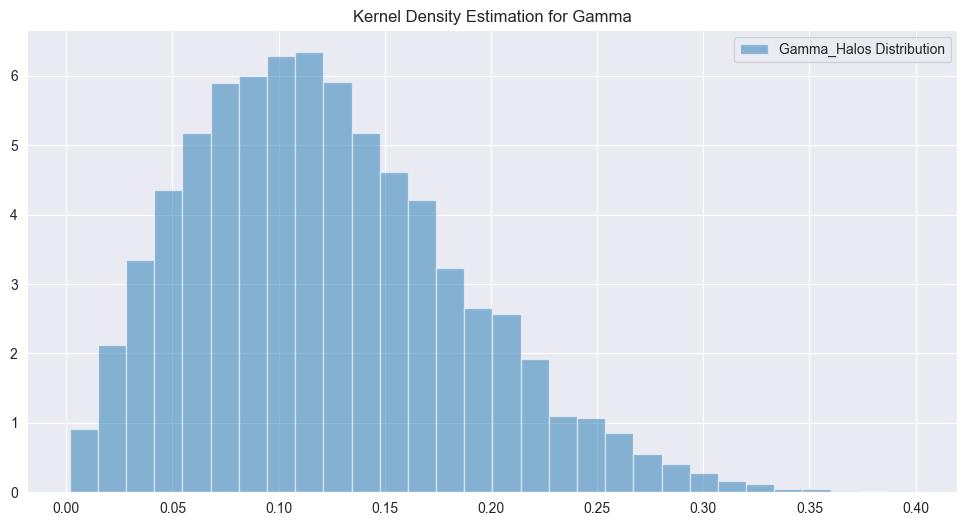

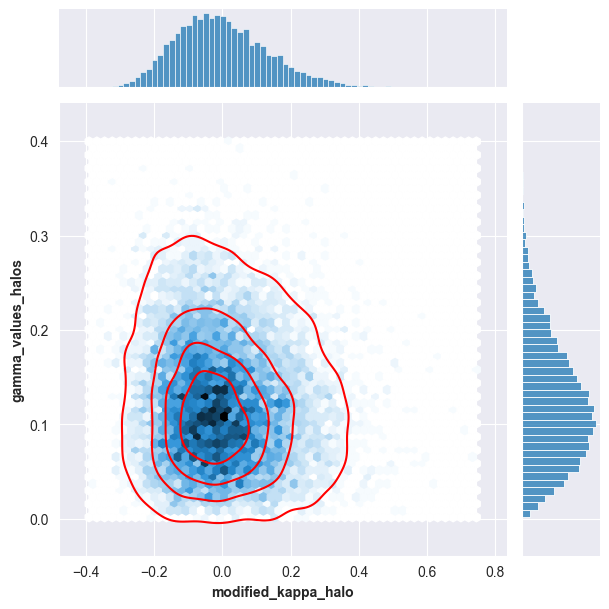

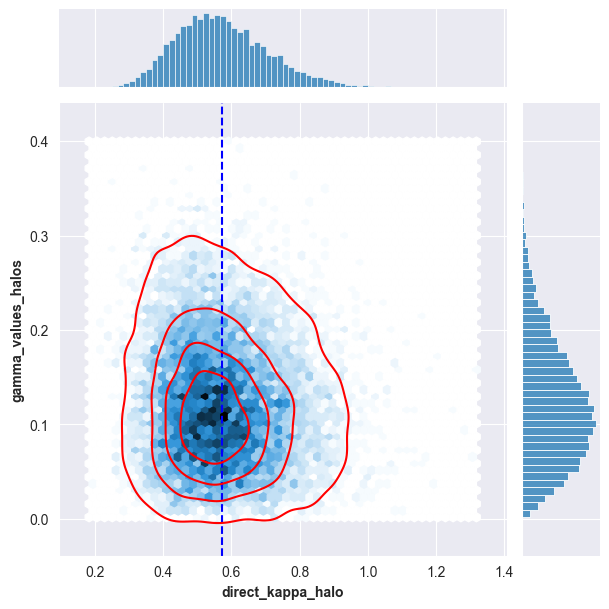

Spearman correlation coefficient:  -0.07115522920576575
Kendall Tau correlation coefficient:  -0.047581218597671955


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title('Kernel Density Estimation for Gamma')
plt.legend()
plt.show()

modified_plot = sns.jointplot(x=modified_kappa_halos, y=gamma_values_halos,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('modified_kappa_halo', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

unmodified_plot = sns.jointplot(x=kappa_values_halos, y=gamma_values_halos,kind='hex')
unmodified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
unmodified_plot.ax_joint.axvline(x=mean_kappa, color='blue', linestyle='--')
unmodified_plot.ax_joint.set_xlabel('direct_kappa_halo', fontweight='bold')
unmodified_plot.ax_joint.set_ylabel('gamma_values_halos', fontweight='bold')
plt.show()

from scipy.stats import spearmanr, kendalltau
print('Spearman correlation coefficient: ', spearmanr(modified_kappa_halos, gamma_values_halos)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(modified_kappa_halos, gamma_values_halos)[0])

Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

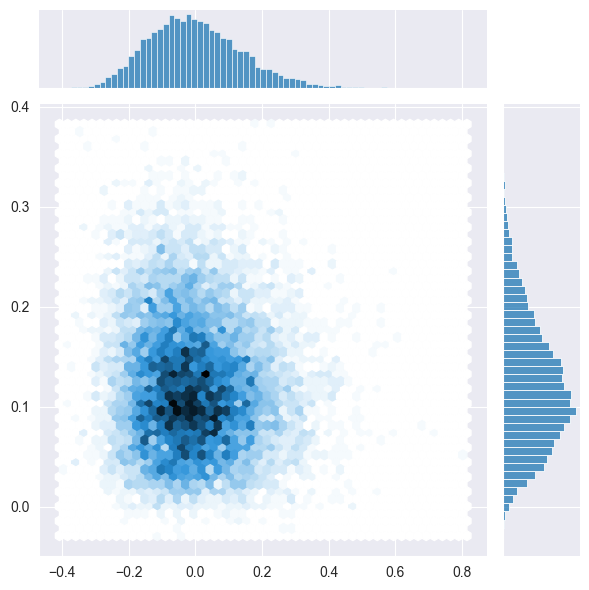

In [6]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()

# Run the method ` run_halos_without_kde()` to obtain kappa and gamma values without using KDE.

 This will generate ` n_iterations` sets of halo lists under the specified `sky_area`.
 For each set, it will simulate `samples_number` times to get the kappa and gamma values
 at the origin. The obtained values will be directly appended without any additional processing.

In [9]:
from sim_pipeline.Halos.halos_plus_glass import run_halos_without_kde_by_multiprocessing
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt

nk,ng = run_halos_without_kde_by_multiprocessing(n_iterations=50, sky_area=0.0001, samples_number=3,cosmo=FlatLambdaCDM(H0=70, Om0=0.3),m_min=None, m_max=None, z_max=None)


The 50 halo-lists took 200.20599913597107 seconds to run


Visualization of ` run_halos_without_kde()`

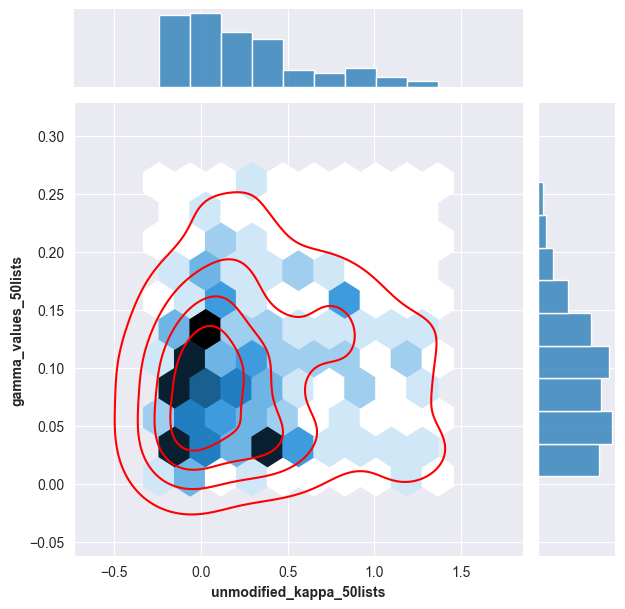

Spearman correlation coefficient:  0.1004329081292502
Kendall Tau correlation coefficient:  0.06791946308724832


In [10]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau
modified_plot = sns.jointplot(x=nk, y=ng,kind='hex')
modified_plot.plot_joint(sns.kdeplot, color="r", zorder=3, levels=5)
modified_plot.ax_joint.set_xlabel('unmodified_kappa_50lists', fontweight='bold')
modified_plot.ax_joint.set_ylabel('gamma_values_50lists', fontweight='bold')
plt.show()
print('Spearman correlation coefficient: ', spearmanr(nk, ng)[0])
print('Kendall Tau correlation coefficient: ', kendalltau(nk, ng)[0])